In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Datasets

In [93]:
c = pd.read_csv("Customers.csv")

In [94]:
p = pd.read_csv("Products.csv")

In [95]:
t = pd.read_csv("Transactions.csv")

In [96]:
c.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [97]:
p.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [98]:
t.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Merging the datasets

In [100]:
merged_data = t.merge(c, on='CustomerID', how='left')

In [101]:
md = merged_data.merge(p, on='ProductID', how='left')

In [164]:
md

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


## Exploratory Data Analysis

In [169]:
# Check for missing values in the datasets
print("Missing values in datasets:\n")
print("Customers:")
print(c.isnull().sum())
print("Products:")
print(p.isnull().sum())
print("Transactions:")
print(t.isnull().sum())

Missing values in datasets:

Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [171]:
#  Summary statistics of numerical columns
md.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


Top regions with highest customer counts:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


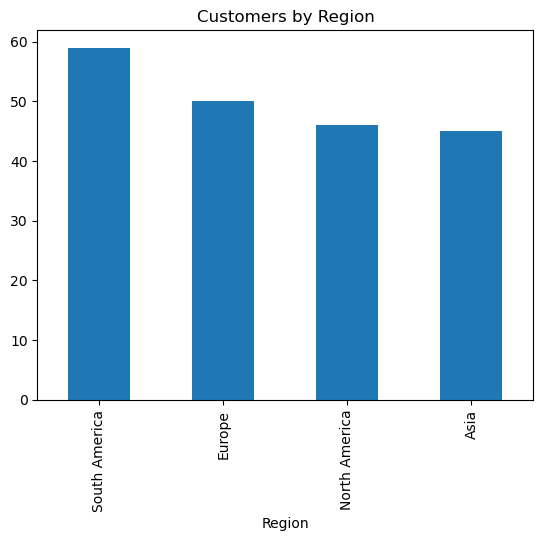

In [106]:
# Top 5 regions with the highest number of customers
customer_region_counts = c['Region'].value_counts()
print("Top regions with highest customer counts:\n", customer_region_counts.head())
customer_region_counts.plot(kind='bar', title='Customers by Region')
plt.show()

From the above we can see that South America has the highest customer base then followed by Europe.

Top product categories by total sales:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


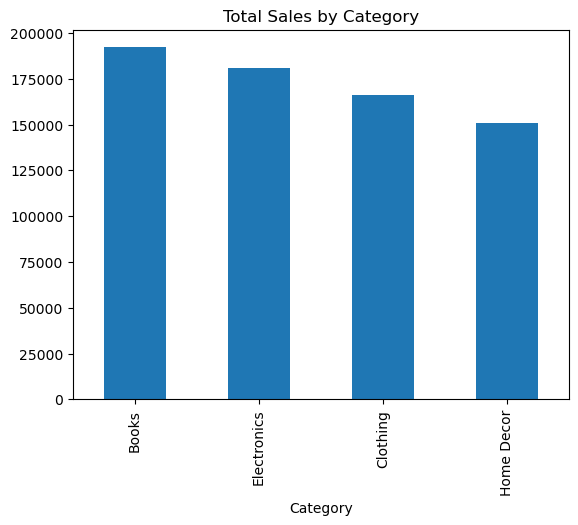

In [108]:
#Most popular product categories by total sales
product_sales = md.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Top product categories by total sales:\n", product_sales)
product_sales.plot(kind='bar', title='Total Sales by Category')
plt.show()

From the above visualisation we cas see which category is contributing to the companys growth the most to the least.

Revenue over time:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


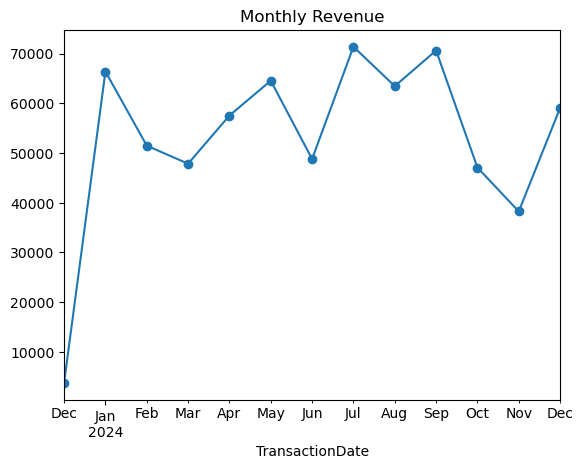

In [183]:
#Total revenue over time
md['TransactionDate'] = pd.to_datetime(md['TransactionDate'])
revenue_time = md.groupby(md['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Revenue over time:\n", revenue_time)
revenue_time.plot(title='Monthly Revenue', marker='o')
plt.show()

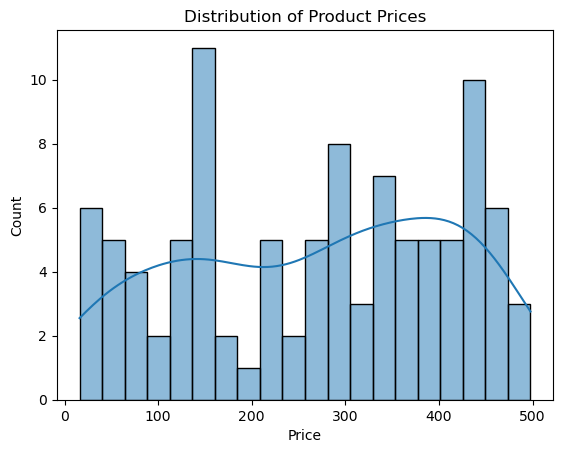

In [110]:
#Distribution of product prices
sns.histplot(p['Price'], kde=True, bins=20)
plt.title('Distribution of Product Prices')
plt.show()

Average transaction value by region:
 Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


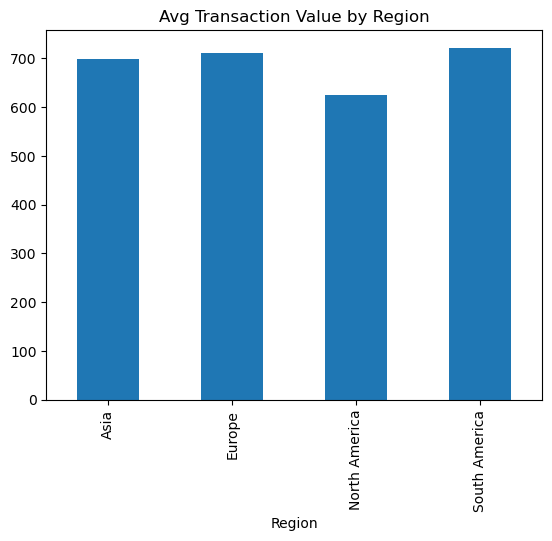

In [111]:
#Average transaction value by region
avg_transaction_by_region = md.groupby('Region')['TotalValue'].mean()
print("Average transaction value by region:\n", avg_transaction_by_region)
avg_transaction_by_region.plot(kind='bar', title='Avg Transaction Value by Region')
plt.show()

Correlation matrix:
             Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


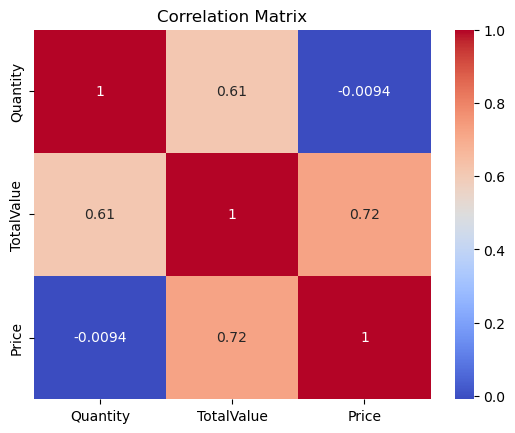

In [173]:
#Correlation matrix for numerical features
correlation_matrix = md.corr(numeric_only=True)
print("Correlation matrix:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Revenue contribution by category:
 Category
Books          27.847639
Clothing       24.082859
Electronics    26.200676
Home Decor     21.868826
Name: TotalValue, dtype: float64


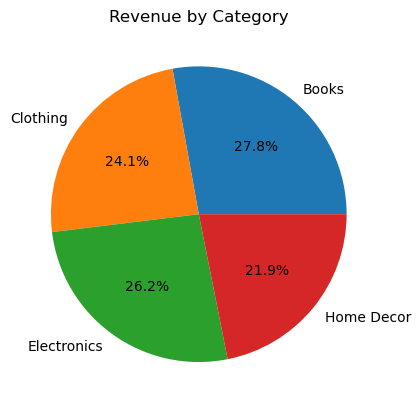

In [177]:
#Revenue contribution by product category
category_revenue = md.groupby('Category')['TotalValue'].sum()
category_revenue_percentage = (category_revenue / category_revenue.sum()) * 100
print("Revenue contribution by category:\n", category_revenue_percentage)
category_revenue_percentage.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Category')
plt.ylabel('')
plt.show()

Customer loyalty distribution:
 5     42
4     31
3     31
6     25
8     20
7     18
1     12
2      9
9      5
10     4
11     2
Name: count, dtype: int64


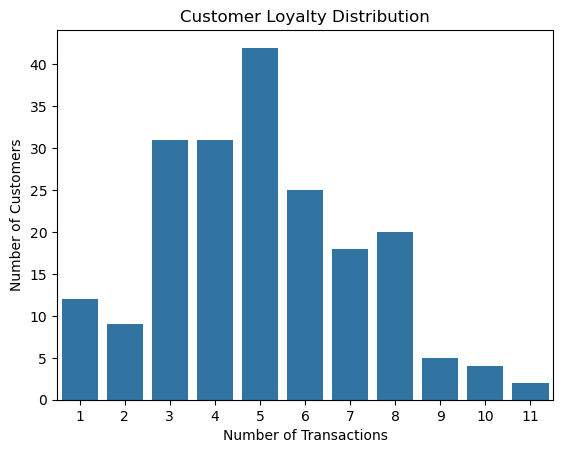

In [181]:
#Customer loyalty analysis (repeat customers)
repeat_customers = md.groupby('CustomerID').size()
loyalty_distribution = repeat_customers.value_counts()
print("Customer loyalty distribution:\n", loyalty_distribution)
sns.barplot(x=loyalty_distribution.index, y=loyalty_distribution.values)
plt.title('Customer Loyalty Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()